<a href="https://colab.research.google.com/github/uliang/MS9002-Data-mining-techniques/blob/master/MS9002_Lab_1_Understanding_Bias_and_variance_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np


Test set score: 0.8875


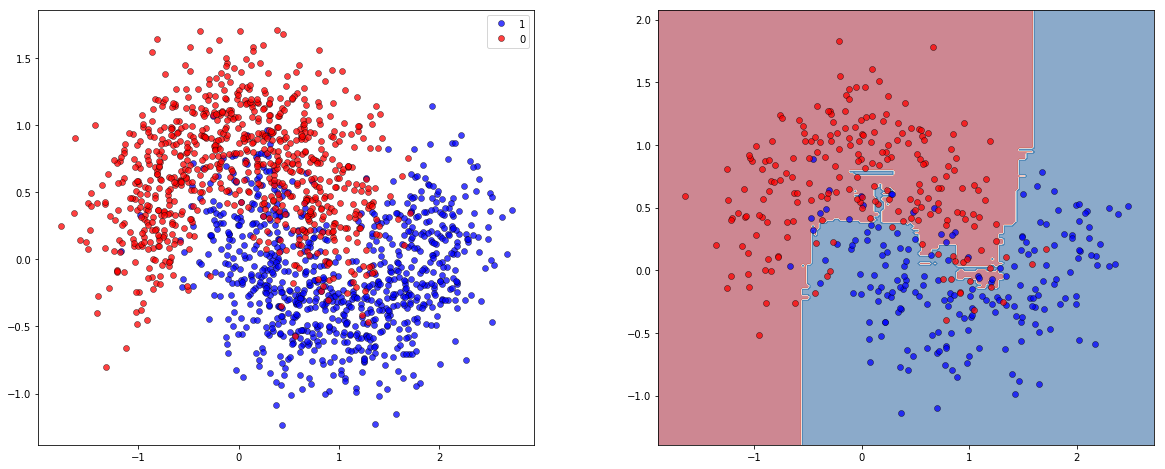

In [33]:
#@title Showing the effect of bias and variance {display-mode: "form"}

#@markdown Use the sliders to control the complexity of the model. Larger *n_estimators* 
#@markdown values mean a more complex model and may lead to high variance. 
#@markdown 
#@markdown On the other hand, large *min_samples_split* values usually lead to a 
#@markdown simpler model, makes the model more suceptible to bias error. 

noise = 0.31 #@param {type:"slider", min:0.01, max:1.5, step:0.02}
min_samples_split = 19 #@param {type:"slider", min:2, max:20, step: 1}
n_estimators = 62 #@param {type: "slider", min:1, max: 200, step:1}
n_samples = 2000 #@param {type: "slider", min: 100, max: 2000, step:100}

# Generate half moons dataset 

from sklearn.datasets import make_moons
from sklearn.model_selection import  train_test_split

X, y = make_moons(n_samples=n_samples, noise=noise, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

%matplotlib inline 

import matplotlib.pyplot as plt 

fig, (ax, ax_result) = plt.subplots(1,2, figsize=(20,8))
fig.subplots_adjust(wspace=0.25)

# Plot training data
options = dict(mew=0.5, mec='k', alpha=0.75)

ax.plot(X_train[y_train==1, 0],
        X_train[y_train==1, 1], 'bo', label='1', **options)
ax.plot(X_train[y_train==0, 0],
        X_train[y_train==0, 1], 'ro', label='0', **options)

ax.legend()

# Fit model and predict 
from sklearn.ensemble import RandomForestClassifier

_model =  RandomForestClassifier(n_estimators=n_estimators, 
                                 min_samples_split=min_samples_split)
_model.fit(X_train,y_train) 

x, y = np.linspace(X_test[:, 0].min()-0.25, X_test[:, 0].max()+0.25, 200)\
      ,np.linspace(X_test[:, 1].min()-0.25, X_test[:, 1].max()+0.25, 200) 

xx, yy = np.meshgrid(x, y)
_pred = _model.predict(np.c_[xx.ravel(),yy.ravel()])

# Plot results
grid_pred = _pred.reshape(xx.shape) 
ax_result.contourf(xx, yy, grid_pred, cmap='RdBu', alpha=0.5)
ax_result.plot(X_test[y_test==1, 0],
        X_test[y_test==1, 1], 'bo', label='1', **options)
ax_result.plot(X_test[y_test==0, 0],
        X_test[y_test==0, 1], 'ro', label='0', **options)

print(f'Test set score: {_model.score(X_test, y_test):.4f}')